In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. 
Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [36]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
print(gdp_df.head())
print(gdp_df.tail())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN
     Country or Area  Year        Value  Value Footnotes
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?
There are 4 columns with types float(2), int(1), object(1)

In [37]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB
None


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [38]:
gdp_df = gdp_df.drop(['Value Footnotes'], axis=1)
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
print(gdp_df.head())


       Country  Year  GDP_Per_Capita
0  Afghanistan  2020     1970.560169
1  Afghanistan  2019     2065.036235
2  Afghanistan  2018     2033.804389
3  Afghanistan  2017     2058.400221
4  Afghanistan  2016     2057.067978


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [70]:
missing_years = print(gdp_df.groupby(["Country", "Year"])["GDP_Per_Capita"].mean())

years = [gdp_df["Year"]]
print(years)

print(gdp_df[["Country", "Year"]].isin(years))

country_count = gdp_df.groupby('Country')['Year'].count()
country_count = country_count.sort_values(ascending=False)
print(country_count)


Country      Year
Afghanistan  2002    1189.784668
             2003    1235.810063
             2004    1200.278013
             2005    1286.793659
             2006    1315.789117
                        ...     
Zimbabwe     2016    2341.304920
             2017    2416.049969
             2018    2497.136618
             2019    2310.634802
             2020    2134.555461
Name: GDP_Per_Capita, Length: 7176, dtype: float64
[0       2020
1       2019
2       2018
3       2017
4       2016
        ... 
7171    1994
7172    1993
7173    1992
7174    1991
7175    1990
Name: Year, Length: 7176, dtype: int64]
      Country   Year
0       False  False
1       False  False
2       False  False
3       False  False
4       False  False
...       ...    ...
7171    False  False
7172    False  False
7173    False  False
7174    False  False
7175    False  False

[7176 rows x 2 columns]


In [76]:
country_count = gdp_df.groupby('Country')['Year'].count()
country_count = country_count.sort_values(ascending=False)
print(country_count)

countries = gdp_df[["Country", ["Year"].count() < 30]]
print(countries)

Country
Least developed countries: UN classification          31
Niger                                                 31
Middle East & North Africa (excluding high income)    31
Middle income                                         31
Mongolia                                              31
                                                      ..
Kosovo                                                13
Turks and Caicos Islands                              10
Sint Maarten (Dutch part)                             10
Somalia                                                8
Djibouti                                               8
Name: Year, Length: 242, dtype: int64


TypeError: list.count() takes exactly one argument (0 given)

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

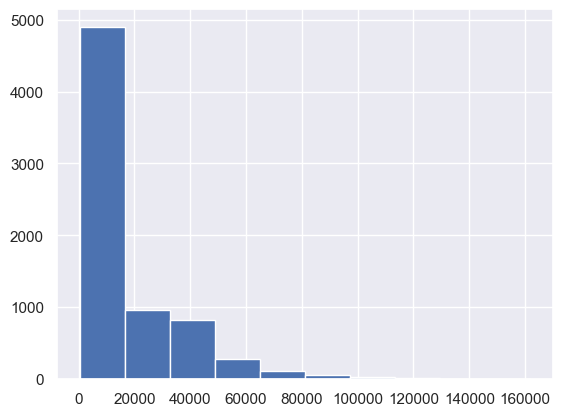

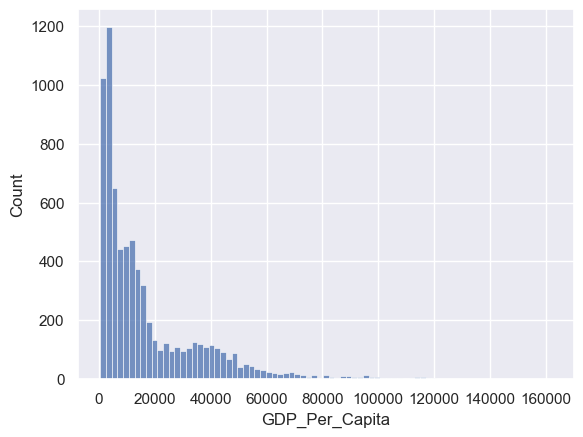

In [85]:
plt.hist(gdp_df['GDP_Per_Capita'])
plt.show()

sns.set(style="darkgrid")

sns.histplot(data=gdp_df, x="GDP_Per_Capita")
plt.show()